In [4]:
# Check for GPU availability
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow is using GPU:", tf.test.is_built_with_cuda())

import tensorflow as tf

# Set GPU as the default device
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)



Num GPUs Available:  1
TensorFlow is using GPU: True
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [5]:
# Clone the repository
!git clone https://github.com/Bhavnoor-Coders-1010/food101


Cloning into 'food101'...
remote: Enumerating objects: 6220, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 6220 (delta 1), reused 16 (delta 1), pack-reused 6200 (from 4)
Receiving objects: 100% (6220/6220), 169.23 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (6256/6256), done.


In [6]:
# Import libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from google.colab import files



In [7]:
# Step 1: Define dataset path
dataset_path = "/content/food101/DataFOOD101"
classes = os.listdir(dataset_path)  # Assuming each class has its own folder



In [8]:
# Step 2: Load and preprocess images
img_size = (150, 150)
X, Y = [], []

for class_index, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    # Check if the path is a directory before proceeding
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                X.append(img)
                Y.append(class_index)

X = np.array(X, dtype='float32') / 255.0  # Normalize image pixel values
Y = np.array(Y)



In [9]:
# Step 3: One-hot encode labels
Y = to_categorical(Y, num_classes=len(classes))

# Step 4: Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 5: Load pre-trained VGG16 model
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [10]:
# Fine-tune specific layers
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':  # Unfreeze from block5_conv1 onwards
        set_trainable = True
    layer.trainable = set_trainable

conv_base.summary()



Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [11]:
# Step 6: Define the sequential model
model = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(classes), activation='softmax')  # Multi-class classification
])



In [12]:
# Step 7: Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [13]:
# Step 8: Train the model
history = model.fit(
    X_train, Y_train,
    epochs=10,
    validation_data=(X_test, Y_test),
    batch_size=32
)



Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 147ms/step - accuracy: 0.7887 - loss: 8.3229 - val_accuracy: 0.8385 - val_loss: 0.5246
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.8364 - loss: 0.4847 - val_accuracy: 0.8385 - val_loss: 0.4701
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.8429 - loss: 0.4837 - val_accuracy: 0.8385 - val_loss: 0.4606
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.8522 - loss: 0.4229 - val_accuracy: 0.8385 - val_loss: 0.4486
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.8575 - loss: 0.4079 - val_accuracy: 0.8385 - val_loss: 0.4456
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.8577 - loss: 0.3810 - val_accuracy: 0.8385 - val_loss: 0.5741
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.8682 - loss: 0.3416 - val_accuracy: 0.8257 - val_loss: 0.6505
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9103 - loss: 0.2291

In [14]:
model.save('trained_model.h5')
print("Model saved as 'trained_model.h5'")
files.download('trained_model.h5')

Model saved as 'trained_model.h5'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

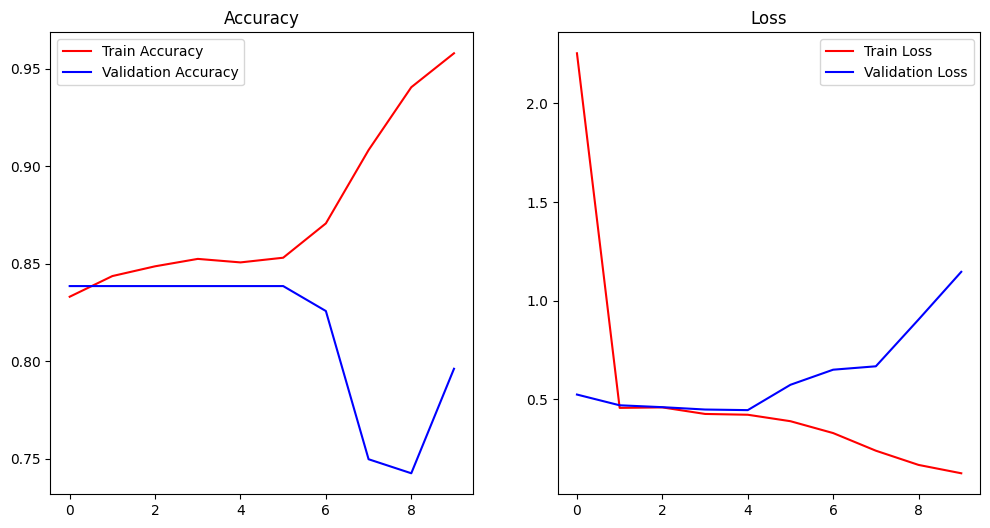

In [15]:
# Step 9: Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [16]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('trained_model.h5')

# Define the class names (adjust these based on your dataset's classes)
classes = ['pizza', 'burger', 'sushi', 'pasta', 'salad']  # Example class names

def predict_food(image_path):
    """
    Predict the food item in an image.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        str: Predicted food item name.
    """
    # Load and preprocess the image
    img_size = (150, 150)  # Same size as used during training
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class index
    predicted_label = classes[predicted_class]

    return predicted_label

# Example usage
image_path = '/content/random.jpg'  # Replace with the actual path
predicted_food = predict_food(image_path)
print(f"The predicted food item is: {predicted_food}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted food item is: pasta


# New Section